## Keras / Tensorflow Regression - Example

Here we're going to attempt to utilize Keras/Tensorflow to predict the price of homes based upon a set of features.

The data being used comes from Kaggle:

https://www.kaggle.com/harlfoxem/housesalesprediction

### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Data Exploration and Cleansing

In [2]:
df = pd.read_csv('Keras/kc_house_data.csv')

Since we're going to predict prices, we can do a quick distribution. We can see the vast majority sit around 500k, and we have some outliers all the way out to 7m+ (but very few).

<AxesSubplot:xlabel='price'>

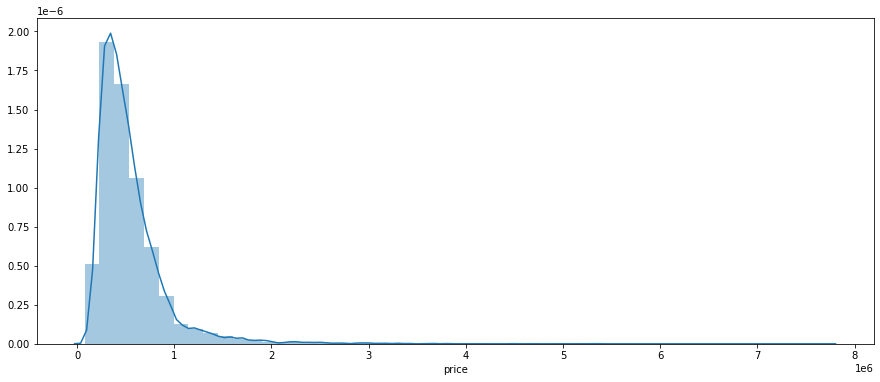

In [5]:
plt.figure(figsize=(15,6))
sns.distplot(df['price'])

One thing we may want to do is get rid of these outliers (at least to an extent). These will certainly affect our model and may skew results. Sorting by price (and from the visual above) we can see that ~3.5m may be a logical cutoff for keeping data.

In [3]:
df.sort_values('price',ascending=False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


If we take this concept, we can find out what percentage of homes are above 350k

In [7]:
#Original
df.shape

(21597, 21)

In [16]:
#Above 350k
df[df['price'] <= 3500000].shape

(21575, 21)

This accounts for less than a percentage of homes, so we could just kick these out completely.

In [17]:
#Kick out outliers
df = df[df['price'] <= 3500000]

We do have a date column in the DataFrame, but it'll probably make more sense to convert these to month/year to allow for better analysis

In [24]:
#Convert string to date
df['date'] = pd.to_datetime(df['date'])

df['year'] = df['date'].apply(lambda date : date.year)
df['month'] = df['date'].apply(lambda date : date.month)

In [25]:
#Drop since we no longer need the original field
df = df.drop('date',axis=1)

In addition - we can drop a few other fields we won't need. ID will not serve any purpose in our model and can be thrown away. In addition, Zipcode is really not in a useful format for predictive analysis and would need to be transformed in some way. However, in reading up on this dataset - folks seem to agree that this data seems bad or incorrect. So, I'm going to cut my losses and also toss it.

In [27]:
df = df.drop('id',axis=1)
df = df.drop('zipcode',axis=1)

In [28]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2015,2


### Build Model

In [29]:
#Separate features from label
X = df.drop('price',axis=1)
y = df['price']

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
#Perform splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

#### Perform Scaling
Since the data across all fields varies, it's best to scale it first

In [36]:
from sklearn.preprocessing import MinMaxScaler

In [37]:
scaler = MinMaxScaler()

In [38]:
#Fit and transform training and test set
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

#### Fit to Neural Network

In [115]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [116]:
#Try to base model off size of dataset
X_train.shape

(15102, 19)

In [117]:
model = Sequential()

#Make it 19 neurons since we have 19 cols
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In an attempt to see how our model actual performs (and if we're overfitting), we're going to utilize the validation_data parameter to pass in the test values, so we can compare the predictions against actual. A batch_size of 256 should help to avoid overfitting (smaller should be better here).

In [136]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=256,epochs=400)

Compare the losses of the training vs. test dataset to see if we're overfitting.

If you see the orange line (val_loss) go up towards the end it means your overfitting, because now you have a much larger loss on your validation data.

With the plot below, we do see the val_loss start to slightly rise above 350 epochs which could indicate a little bit of overfitting with the data.

<AxesSubplot:>

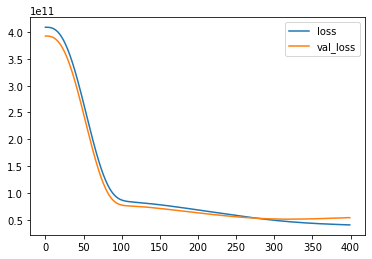

In [119]:
losses = pd.DataFrame(model.history.history)
losses.plot()

#### Predict and Evaluate

In [120]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [121]:
#Grab predictions from the testing set
predictions = model.predict(X_test)

In [123]:
#MAE
mean_absolute_error(y_test,predictions)

175469.5181396948

In [138]:
#Mean price
df['price'].mean()

536130.9431286211

The Mean Absolute Error indicates we're off by an average of 175k, which isn't great given we're looking at an average home price of ~536k. Meaning we're off over 30%. I'm guessing we're still encountering too much interference from outliers above 350k - so let's continue.

In [124]:
#MSE
np.sqrt(mean_squared_error(y_test,predictions))

232169.4906319861

In [126]:
#Best possible score is 1.0
#How much variance is explained by our model?
explained_variance_score(y_test,predictions)

0.6408030666172726

You can see we're only explaining approximately 64% of variance in the data. We could try to plot this data out to see if can visually see how well we're actually doing.

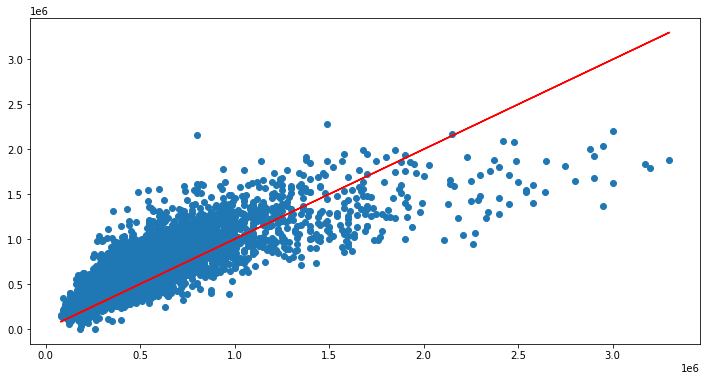

In [127]:
plt.figure(figsize=(12,6))
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,'r')

We're actually doing a good job on predictions on prices below 1.5m or so. The problem seems to exist for the more expensive houses.

### Predict New Home Prices

So how can we predict the price of a net new home? In the example below we take the first house out of the DataFrame and remove the price. Then we scale the data and predict using our trained model. Now we can compare the price predicted against the actual.

In [132]:
#Assign the first house in the DataFrame to a new DataFrame
single_house = df.drop('price',axis=1).iloc[0]

In [140]:
#Scale the values AND reshape the results (so the shape matches the expected shape for the model)
single_house = scaler.transform(single_house.values.reshape(-1,19))

In [134]:
#Predict the price
model.predict(single_house)

array([[293904.97]], dtype=float32)

In [135]:
#Check the real price
df.head(1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10


We're overshooting the price here a bit, we're predicting 293k, but the actual house is 222k. We'd probably need to spend some more time tweaking the model to get things to come out a bit better. It takes a bit to get things perfect - this result is after I've gone through 4-5 different models and I'm getting much closer to the actual.